# Kaggle Competition
## Data Science Project: House Prices Prediction

## Import All Relevant Packages/Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import hvplot.pandas
from IPython.display import display, HTML

## Data Wrangling

In [2]:
# Import dataset in pandas dataframe
train = pd.read_csv(r"C:\Users\nizma\OneDrive\Desktop\Portofolio\Project Portofolio\House Prices Prediction\train.csv")

test = pd.read_csv(r"C:\Users\nizma\OneDrive\Desktop\Portofolio\Project Portofolio\House Prices Prediction\test.csv")

In [3]:
print("Full train dataset shape is {}".format(train.shape))
print("Full test dataset shape is {}".format(test.shape))

Full train dataset shape is (1460, 81)
Full test dataset shape is (1459, 80)


In [4]:
# Function to create scrollable table
def create_scrollable_table(df, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height: 250px; overflow:auto;">'
    html += df.to_html()
    html += '</div>'
    return html


The train dataset is composed of 81 columns and 1460 entries. On the other hand, the test dataset is composed of 80 columns and 1459 entries. We can see all dimensions of our both dataset by printing out the first 5 entries using the following code:

In [5]:
# Display the fisrt 5 rows of the train datasets in pandas dataframe
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# Display the first 5 rows of the test datasets in pandas dataframe
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


There are 79 feature columns. Using these features to predict the house sale price indicate by the label column named SalePrice.

We can inspect the types of feature columns using the following code:

In [7]:
# Display types of the each columns in train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We can partition the types of feature column into numerical and categorical feature using the following code:

In [8]:
# Summary statistics for numerical features of train dataset in pandas dataframe
numerical_features = train.select_dtypes(include=[np.number])
num_summary_stats = numerical_features.describe().T
html_numerical = create_scrollable_table(num_summary_stats, 'numerical_features', 'Summary statistics for numerical features')

display(HTML(html_numerical))

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [9]:
# Summary statistics for categorical features of train dataset in pandas dataframe
categorical_features = train.select_dtypes(include=[object])
cat_summary_stats = categorical_features.describe().T
html_categorical = create_scrollable_table(cat_summary_stats, 'categorical_features', 'Summary statistics for categorical features')

display(HTML(html_categorical))

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


**Outlier**

From [Documentation](https://www.kaggle.com/code/serigne/stacked-regressions-top-4-on-leaderboard#Outliers) Housing Data indicates that are outliers present in the training data.
Let's we explore these dataset to inspect the outliers.

In [10]:
# Explore the outlier in train dataset
train.hvplot.scatter(x="GrLivArea",
                     y="SalePrice",
                     xlabel="GrLivArea",
                     ylabel="SalePrice",
                     height=400,
                     width=600,)

:Scatter   [GrLivArea]   (SalePrice)

We can see that there is two data with extremly large GrLivArea with a low price. These values are huge outliers.

Note that ouliers removal is not always safe. There are probably others outliers in the training data. However, removing all them may affect badly to our models if ever there were also outliers in the test data. That's why, instead of removing them all, we will just manage to make some of our models robust on them.

For this case, we decided to remove these two as they are very huge and really bad (extremly large areas for very low prices).

In [11]:
# Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

# Check the graphic again
train.hvplot.scatter(x="GrLivArea",
                     y="SalePrice",
                     xlabel="GrLivArea",
                     ylabel="SalePrice",
                     height=400,
                     width=600,)

:Scatter   [GrLivArea]   (SalePrice)

**Missing Data**

We will inspect the null values in train and test dataset in pandas dataframe using the following code:

In [12]:
# Null values in train dataset
train_null_values = train.isnull().sum()
html_train_null_values = create_scrollable_table(train_null_values.to_frame(), 'train_null_values', 'Null values in the train dataset')

# Percentage of missing values for each feature in train dataset
train_missing_percentage = (train_null_values / len(train)) * 100
html_train_missing_percentage = create_scrollable_table(train_missing_percentage.to_frame(), 'train_missing_percentage', 'Percentage of missing values for each feature')

display(HTML(html_train_null_values + html_train_missing_percentage))

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
Street,0
Alley,1367
LotShape,0
LandContour,0
Utilities,0


In [13]:
# Exploring rows with missing values
train_rows_with_missing_values = train[train.isnull().any(axis=1)]
html_train_rows_with_missing_values = create_scrollable_table(train_rows_with_missing_values.head(), 'train_rows_with_missing_values', 'Rows with missing values')

display(HTML(html_train_rows_with_missing_values))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [14]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [15]:
# Null values in test dataset
test_null_values = test.isnull().sum()
html_test_null_values = create_scrollable_table(test_null_values.to_frame(), 'test_null_values', 'Null values in the test dataset')

# Percentage of missing values for each feature in test dataset
test_missing_percentage = (test_null_values / len(test)) * 100
html_test_missing_percentage = create_scrollable_table(test_missing_percentage.to_frame(), 'test_missing_percentage', 'Percentage of missing values for each feature')

display(HTML(html_test_null_values + html_test_missing_percentage))

,0
Id,0
MSSubClass,0
MSZoning,4
LotFrontage,227
LotArea,0
Street,0
Alley,1352
LotShape,0
LandContour,0
Utilities,2


In [16]:
# Exploring rows with missing values
test_rows_with_missing_values = test[test.isnull().any(axis=1)]
html_test_rows_with_missing_values = create_scrollable_table(test_rows_with_missing_values.head(), 'test_rows_with_missing_values', 'Rows with missing values')

display(HTML(html_test_rows_with_missing_values))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


We will handle the missing data. Let's first concatenate the train and test data in the same dataframe.

In [17]:
# Concatenate the train and test dataset in the same pandas dataframe
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
all_data.drop(['Id'], axis=1, inplace=True)
print("all_data size is: {}".format(all_data.shape))

all_data size is: (2917, 79)


In [18]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' : all_data_na})
html_missing_data = create_scrollable_table(missing_data, 'missing_data', 'Missing Data')

display(HTML(html_missing_data))

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
MasVnrType,60.541652
FireplaceQu,48.680151
LotFrontage,16.660953
GarageFinish,5.450806
GarageQual,5.450806
GarageCond,5.450806


Text(0.5, 1.0, 'Percent missing data by feature')

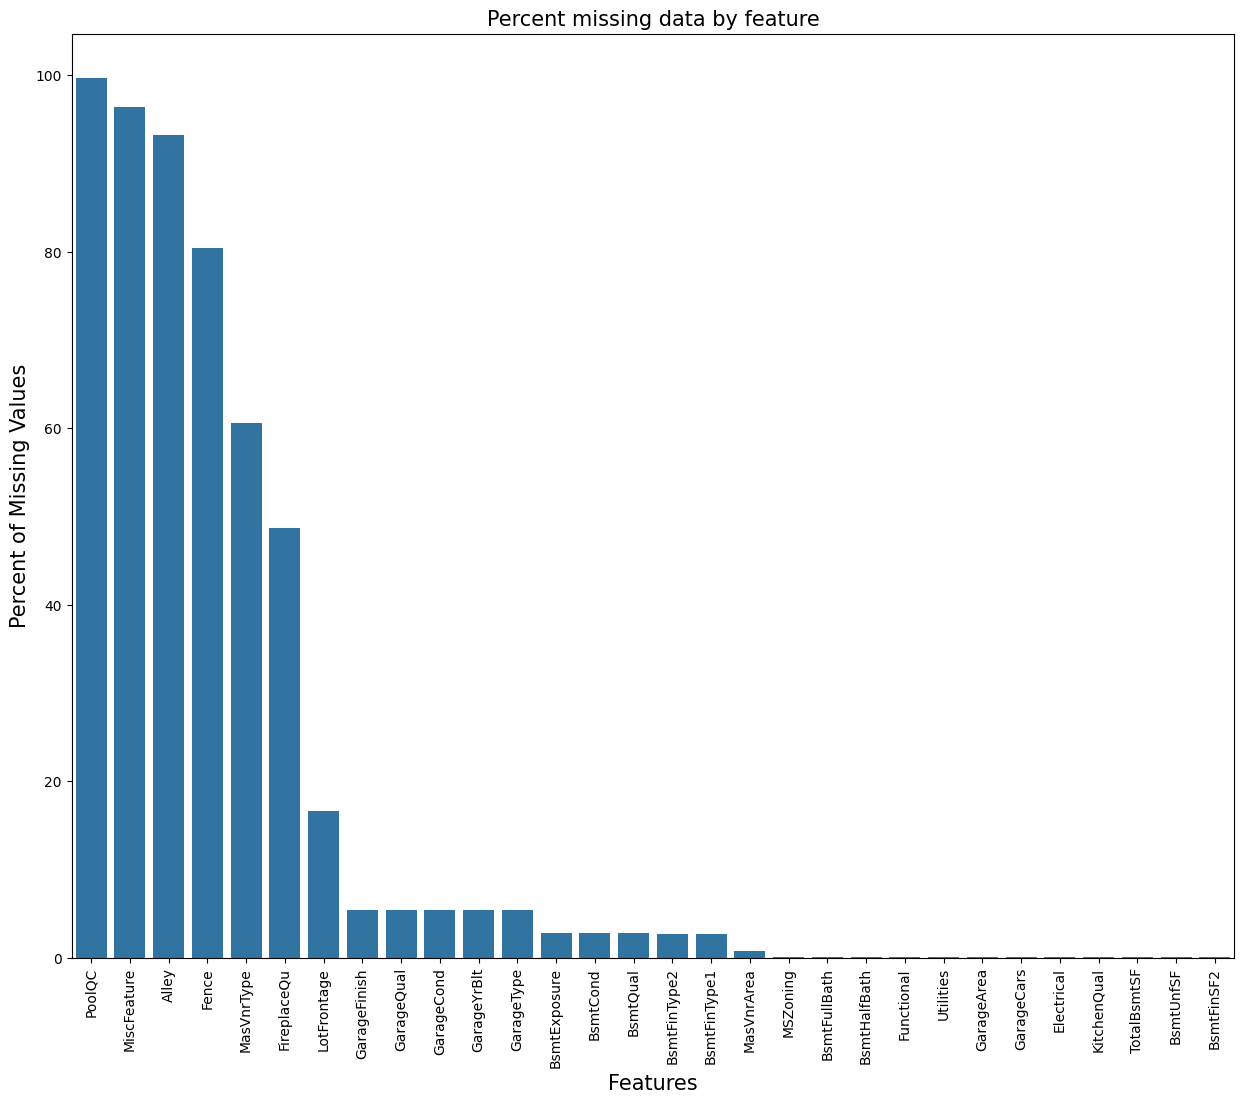

In [19]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='vertical')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of Missing Values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

- **PoolQC** : data description says "NaN" (missing values) means No Pool. The ratio of missing value is more than 99% means that majority of the houses has no pool in general.

- **MiscFeature** : data description says "NaN" (missing values) means No Misc Feature. The ratio of missing value is more than 96% means that majority of the houses has no Misc Feature in general.

- **Alley** : data description says "NaN" (missing values) means No Alley access. The ratio of missing value is more than 93% means that majority of the houses has no alley access in general.

- **Fence** : data description says "NaN" (missing values) means No Alley access. The ratio of missing value is more than 80% means that majority of the houses has no fence in general.

- **FireplaceQu** : data description says "NaN" (missing values) means No Fireplace. The ratio of missing value is more than 48% means that half of the houses has no fireplace in general.

We will replace NaN (missing values) in PoolQC, MiscFeature, Alley, Fence, and FireplaceQu columns with string "None".

In [20]:
cols = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu"]
all_data[cols] = all_data[cols].fillna("None")

- **LotFrontage** : Since the area of each street connected to the house property most likely have similar area to the other houses in its neighborhood, we can fill in missing values by the median LotFrontage of the neighborhod.

In [21]:
# Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

- **GarageType, GarageFinish, GarageQual, GarageCond** : Replace missing data with "None".

In [22]:
cols = ["GarageType", "GarageFinish", "GarageQual", "GarageCond"]
all_data[cols] = all_data[cols].fillna("None")

- **GarageYrBlt, GarageArea, and GarageCars** : Replace missing data with 0, since No garage means no cars in such garage.

In [23]:
cols = ["GarageYrBlt", "GarageArea", "GarageCars"]
all_data[cols] = all_data[cols].fillna(0)

- **BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, and BsmtHalfBath** : missing values are likely zero for having no Basement.

In [24]:
cols = ["BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath"]
all_data[cols] = all_data[cols].fillna(0)

- **BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2** : For all these categorical basement-related features, NaN means that there is no basement.

In [25]:
cols = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]
all_data[cols] = all_data[cols].fillna("None")

- **MasVnrArea and MasVnrType** : 'NaN' most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.

In [26]:
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")

- **MSZoning (The general zoning classification)** : 'RL' is by far the most common value. So we can fill in missing values with 'RL'

In [27]:
all_data["MSZoning"] = all_data["MSZoning"].fillna(all_data["MSZoning"].mode()[0])

- **Utilities** : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.

In [28]:
all_data = all_data.drop(['Utilities'], axis=1)

- **Functional** : data description says NA means typical

In [29]:
all_data["Functional"] = all_data["Functional"].fillna('Typ')

- **Electrical** : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.

In [30]:
all_data["Electrical"] = all_data["Electrical"].fillna(all_data["Electrical"].mode()[0])

- **KitchenQual**: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.

In [31]:
all_data["KitchenQual"] = all_data["KitchenQual"].fillna(all_data["KitchenQual"].mode()[0])

- **Exterior1st and Exterior2nd** : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string

In [32]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

- **SaleType** : Fill in again with most frequent which is "WD"

In [33]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

- **MSSubClass** : Na most likely means No building class. We can replace missing values with None

In [34]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

Now, we check is there any remaining missing values?

In [35]:
# Checking the possibility of missing values
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' : all_data_na})
html_missing_data = create_scrollable_table(missing_data, 'missing_data', 'Missing Data')

display(HTML(html_missing_data))

,Missing Ratio


We can see that there is no remaining missing value in train and test dataset. Since there is no missing values, we will separate the train and test dataset from all_data.

In [36]:
# Separate train and test from all_data in pandas dataframe
train = all_data.iloc[:ntrain, :]
test = all_data.iloc[ntrain:, :]

## Exploratory Data Analysis (EDA)

### What question do we want to ask of the data?
- What is the distribution of housing types and its relationship with selling prices?
- Does zoning impact the sale price?
- Does street and alley access types effect on sale price?
- What is the average sale price by property shape?
- Is there a correlation between property age and sale price?
- Is there a correlation between living area and sale price?
- Does sale price change year to year?

### Explore the Dependent Variable

**SalePrice** is the variable we need to predict. So, let's do some analysis on this variabel first.
- Should it be normalized?
- How to normalized the dependent variable?

In [37]:
# Fit a normal distribution to the SalePrice data
mu, sigma = stats.norm.fit(y_train)

# Create a histogram of the SalePrice column
hist_data = go.Histogram(x=y_train,
                         nbinsx=50,
                         name="Histogram",
                         opacity=0.75,
                         histnorm='probability density')

# Calculate the normal distribution based on the fitted parameters
x_norm = np.linspace(y_train.min(), y_train.max(), 100)
y_norm = stats.norm.pdf(x_norm, mu, sigma)

# Create the normal distribution overlay
norm_data = go.Scatter(x=x_norm, y=y_norm, mode="lines",
                       name=f"Normal dist. (μ={mu:.2f}, σ={sigma:.2f})", line=dict(color="green"))

# Combine the histogram and the overlay
fig = go.Figure(data=[hist_data, norm_data])

# Set the layout for the plot
fig.update_layout(title="SalePrice Distribution",
                  xaxis_title="SalePrice",
                  yaxis_title="Density",
                  legend_title_text="Fitted Normal Distribution")

# Create a Q-Q plot
qq_data = stats.probplot(y_train, dist="norm")
qq_fig = px.scatter(x=qq_data[0][0],
                    y=qq_data[0][1],
                    labels={'x': 'Theoretical Quantiles', 'y': 'Ordered Values'})
qq_fig.update_layout(title="Q-Q plot")

# Calculate the line of the best fit
slope, intercept, r_value, p_value, std_err = stats.linregress(qq_data[0][0], qq_data[0][1])
line_x = np.array(qq_data[0][0])
line_y = intercept + slope * line_x

# Add the line of the best fit to the Q-Q plot
line_data = go.Scatter(x=line_x, y=line_y,
                       mode="lines",
                       name="Normal Line",
                       line=dict(color="green"))

# Update the Q-Q plot with the normal line
qq_fig.add_trace(line_data)

# Show the plots
fig.show()
qq_fig.show()

From the normal distribution and Q-Q plot above, we can see that the dependent variable seems like right skewed.

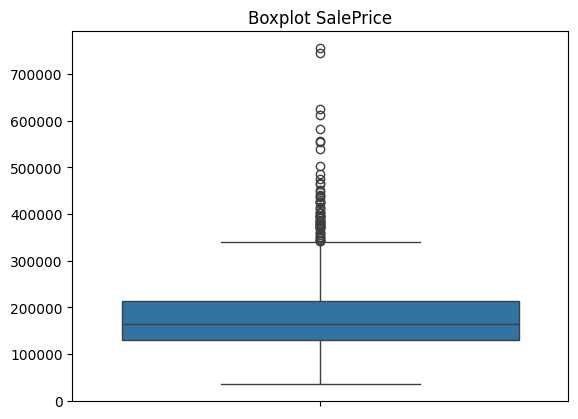

In [38]:
# Check outliers in SalePrice
sns.boxplot(y=y_train)
plt.title("Boxplot SalePrice")
plt.show()

**Data Correlation**

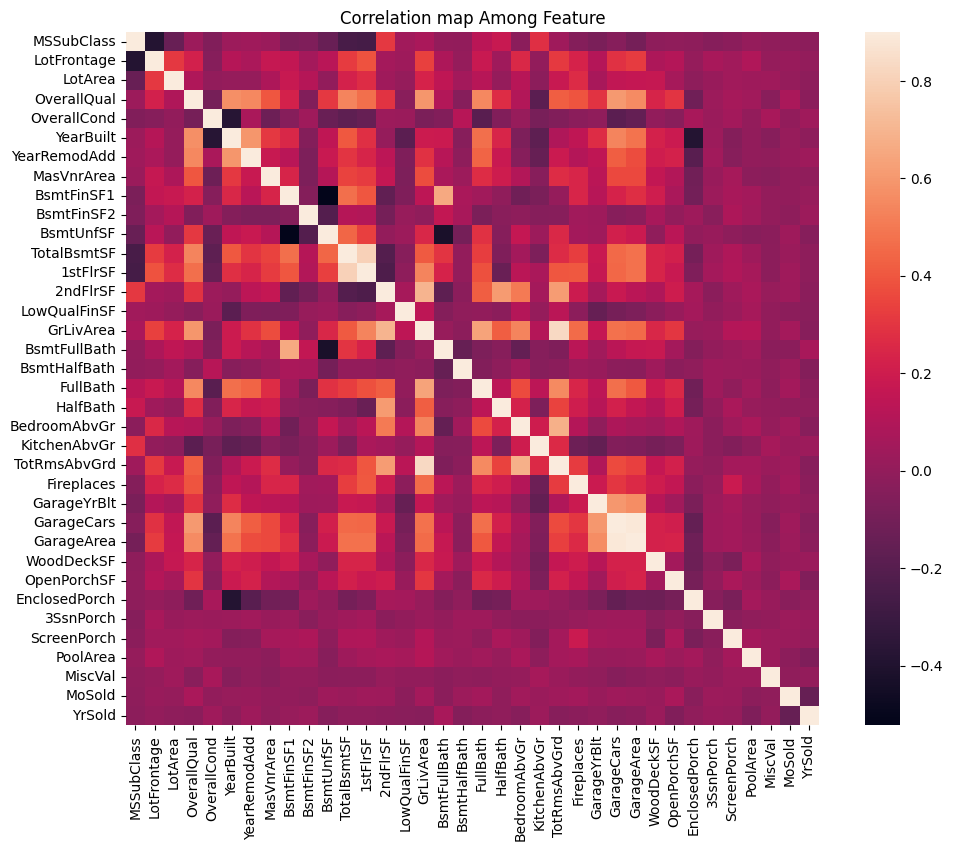

In [39]:
# Correlation map to see how feature are correlated with SalePrice
train_num = train.select_dtypes(include=['number'])
plt.subplots(figsize=(12, 9))
sns.heatmap(train_num.corr(),
            vmax=0.9,
            square=True)
plt.title("Correlation map Among Feature")
plt.show()

### Question 1:
What is the distribution of housing types and its relationship with selling prices?

In [40]:
train_data = train.copy()
train_data["SalePrice"] = y_train

# Distribution of housing types
housing_type_counts = train_data['BldgType'].value_counts()
fig1 = go.Figure()
fig1.add_trace(go.Bar(x=housing_type_counts.index,
                      y=housing_type_counts.values,
                      name="Count"))
fig1.update_layout(title="Distribution of Housing Types",
                   xaxis_title="BldgType",
                   yaxis_title="Count")
fig1.show()

# Average sale price based on housing types
housing_type_avg = train_data.groupby('BldgType')['SalePrice'].mean()
fig2 = go.Figure()
fig2.add_trace(go.Bar(
    x=housing_type_avg.index,
    y=housing_type_avg.values,
    marker=dict(color='#2ECC71'),
    name="Average Sale Price"
))
fig2.update_layout(
    title="Average Sale Price by Housing Type",
    xaxis_title="BldgType",
    yaxis_title="Average SalePrice",
)
fig2.show()


### Question 2:
Does zoning impact the sale price?

In [41]:
# Zoning impact on Sale Price
zoning_impact = train_data.groupby('MSZoning')['SalePrice'].mean()
fig3 = go.Figure()
fig3.add_trace(go.Bar(
    x=zoning_impact.index,
    y=zoning_impact.values,
    marker=dict(color='#9B59B6')
))
fig3.update_layout(
    title="Average Sale Price by Zoning",
    xaxis_title="Zoning",
    yaxis_title="SalePrice"
)
fig3.show()

### Question 3:
Does street and alley access types effect on sale price?

In [42]:
# Street and alley access type effect on sale price
street_price = train_data.groupby('Street')['SalePrice'].mean()
alley_price = train_data.groupby('Alley')['SalePrice'].mean()

# Street price
colors_street = np.where(street_price.index == 'Pave', 'green', 'orange')
fig4 = px.bar(x=street_price.index,
              y=street_price.values,
              title="Average Sale Price by Street Type",
              color=colors_street, color_discrete_sequence=['green', 'orange'])
fig4.update_xaxes(title='Street Type')
fig4.update_yaxes(title='SalePrice')
fig4.update_layout(showlegend=False)
fig4.show()

# Alley price
fig5 = go.Figure()
fig5.add_trace(go.Bar(
    x=alley_price.index,
    y=alley_price.values,
    marker=dict(color='light blue'),
    name="Average SalePrice"
))

fig5.update_layout(
    title="Average Sale Price by Alley Access",
    xaxis_title="Alley Access",
    yaxis_title="Average SalePrice"
)

fig5.show()

### Question 4:
What is the average sale price by property shape?

In [43]:
# Average Sale Price by Property Shape
lotshape_avg_price = train_data.groupby('LotShape')['SalePrice'].mean()

fig6 = go.Figure()
fig6.add_trace(go.Bar(
    x=lotshape_avg_price.index,
    y=lotshape_avg_price.values,
    marker=dict(color='teal'),
    name="Average SalePrice"
))

fig6.update_layout(
    title="Average Sale Price by Property Shape (LotShape)",
    xaxis_title="LotShape",
    yaxis_title="Average SalePrice",
    plot_bgcolor='rgba(32, 32, 32, 1)',
    paper_bgcolor='rgba(32, 32, 32, 1)',
    font=dict(color='white')
)

fig6.show()

# Distribution Sale Price by Property Shape
fig7 = px.box(x=train_data['LotShape'], y=train_data['SalePrice'], color=train_data['LotShape'],
              title="Sale Price Distribution by Property Shape (LotShape)",
              labels={"x": "LotShape", "y": "SalePrice"},
              color_discrete_sequence=["teal"])

fig7.update_layout(
    plot_bgcolor='rgba(32, 32, 32, 1)',
    paper_bgcolor='rgba(32, 32, 32, 1)',
    font=dict(color='white')
)

fig7.show()

### Question 5:
Is there a correlation between property age and sale price?

In [44]:
train_data['PropertyAge'] = train_data['YrSold'] - train_data['YearBuilt']

# Scatter plot: Property Age vs SalePrice
fig8 = px.scatter(x=train_data['PropertyAge'], y=train_data['SalePrice'],
                  title="Property Age by Sale Price",
                  labels={"x": "Property Age (Years)", "y": "SalePrice"},
                  color=train_data['PropertyAge'],
                  color_continuous_scale="viridis")

fig8.update_layout(plot_bgcolor = 'rgba(32, 32, 32, 1)',
                   paper_bgcolor = 'rgba(32, 32, 32, 1)',
                   font=dict(color='white'))

fig8.show()

# Line plot: Average SalePrice by PropertyAge
property_age_avg_price = train_data.groupby('PropertyAge')['SalePrice'].mean()

fig9 = px.line(x=property_age_avg_price.index, y=property_age_avg_price.values,
               title="Average Sale Price by Property Age",
               labels={"x": "Property Age (Years)", "y": "Average SalePrice"},
               line_shape="spline")

fig9.update_layout(plot_bgcolor='rgba(32, 32, 32, 1)',
                   paper_bgcolor='rgba(32, 32, 32, 1)',
                   font=dict(color='white'))

fig9.show()

### Question 6:
Is there a correlation between living area and sale price?

In [45]:
# Scatter plot: GrLivArea by SalePrice
fig10 = px.scatter(x=train_data['GrLivArea'], y=train_data['SalePrice'],
                   title="Living Area (GrLivArea) by SalePrice",
                   labels={"x": "Living Area (GrLivArea)", "y": "SalePrice"},
                   color=train_data['GrLivArea'],
                   color_continuous_scale="Viridis")

fig10.update_layout(plot_bgcolor='rgba(32, 32, 32, 1)',
                    paper_bgcolor='rgba(32, 32, 32, 1)',
                    font=dict(color='white'))

fig10.show()

### Question 7:
Does sale price change year to year?

In [46]:
avg_price_per_year = train_data.groupby('YrSold')['SalePrice'].mean()

# Line plot: average SalePrice per year
fig11 = px.line(x=avg_price_per_year.index, y=avg_price_per_year.values,
                title="Average Sale Price per Year Sold",
                labels={"x": "Year Sold", "y": "Average Sale Price"},
                markers=True,
                line_shape="spline")

fig11.update_layout(plot_bgcolor='rgba(32, 32, 32, 1)',
                    paper_bgcolor='rgba(32, 32, 32, 1)',
                    font=dict(color='white'))

fig11.show()

## Modelling

Now, we will do modelling use **Linear Regression**.

In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
import hvplot.pandas

# Split 80% train and 20% test dataset
X = train
y = y_train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_features = train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = train.select_dtypes(include=['object']).columns


### Pipeline Preprocessing

In [48]:
# Pipeline preprocessing
numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, numerical_features),
                                               ('cat', categorical_transformer, categorical_features)])


### Model Pipeline and fit

In [49]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Fit model to train dataset
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'Bsmt...
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object'))])),
                ('regressor', LinearRegression())])

### Evaluation Model

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prediction the SalePrice for test dataset
y_pred = model.predict(X_test)

# Metrics evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R^2 Score: {r2}")

RMSE: 60019.62349574417
R^2 Score: 0.34783978809438176


In [51]:
pd.DataFrame({'True Values': y_test, 'Predicted Values': y_pred}).hvplot.scatter(x='True Values', y='Predicted Values', width=600, height=400, title="True Values vs Predict Values")

:Scatter   [True Values]   (Predicted Values)

### Regression Evaluation Metrics

In [52]:
print("Test set evaluation:")
test_pred = model.predict(X_test)
print(f"MAE: {mean_absolute_error(y_test, test_pred)}")
print(f"MSE: {mean_squared_error(y_test, test_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, test_pred))}")
print(f"R2 Square {r2_score(y_test, test_pred)}")
print("\n" + "-"*20)

print("Train set evaluation:")
train_pred = model.predict(X_train)
print(f"MAE: {mean_absolute_error(y_train, train_pred)}")
print(f"MSE: {mean_squared_error(y_train, train_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, train_pred))}")
print(f"R2 Square {r2_score(y_train, train_pred)}")
print("\n" + "-"*20)


Test set evaluation:
MAE: 20860.089717868817
MSE: 3602355204.5708857
RMSE: 60019.62349574417
R2 Square 0.34783978809438176

--------------------
Train set evaluation:
MAE: 12577.006647708768
MSE: 349211560.3568071
RMSE: 18687.20311755633
R2 Square 0.9463845176737962

--------------------
